In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')


## Population Statistics

In [37]:
populationMu=98.6 # Population Mean
populationSigma = 'N/A' #Population Standard Deviation
populationProportion = 'N/A'

## Sample Statistics

In [39]:
sampleStats = df.temperature.describe()
#Point Estimate
sampleN = sampleStats[0]
sampleMean = sampleStats[1] # Sample Mean xbar
sampleSigma = sampleStats[2] # Sample Standard Deviation
sqRootN = np.sqrt(sampleN)
#If population variance is available, use population standard deviation to calculate standard error, 
#else use sample standard deviation 

sampleDegOfFreedom = sampleN - 1

if populationSigma != 'N/A':
    stdError  = populationSigma /sqRootN
else:
    stdError  = sampleSigma /sqRootN
    
sampleProportion = 'N/A'
    
print("Population mean:", populationMu)
print("Population standard deviation:", populationSigma)
print("Sample size: ", sampleN)
print("Sample mean:", sampleMean)
print("Sample standard deviation:", sampleSigma)
print("Standard Error:", stdError)   
print("Sample Degrees of Freedom:", sampleDegOfFreedom)   

Population mean: 98.6
Population standard deviation: N/A
Sample size:  130.0
Sample mean: 98.2492307692
Sample standard deviation: 0.733183158039
Standard Error: 0.0643044168379
Sample Degrees of Freedom: 129.0


5th percentile: 97.045
95th percentile: 99.300 
median: 98.300 
mean: 98.249


Text(99.3,0.194844,'95th percentile')

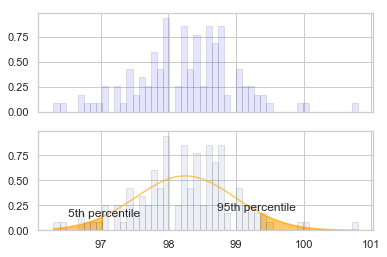

In [106]:
import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.mlab import normpdf

# dummy data
mu = sampleMean
sigma = sampleSigma
n_bins = 50
s=df.temperature
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
n, bins, patches = axes[0].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black', color='blue' )

#histogram
n, bins, patches = axes[1].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 5), np.percentile(s, 95)
print("5th percentile: {:.3f}\n95th percentile: {:.3f} \nmedian: {:.3f} \nmean: {:.3f}".format(q1,q3,median,mu))

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

#add text to bottom graph.
#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
#axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
#axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('5th percentile', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('95th percentile', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')


## Z-critical  and Margin of Error

The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval

In [125]:
#We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.
z_critical = st.norm.ppf(q = 0.975)
print("z-critical value:",z_critical)# Check the z-critical value

margin_of_error = z_critical * stdError

confidence_interval = (sampleMean - margin_of_error,
                       sampleMean + margin_of_error)  

print("Confidence interval:",confidence_interval)

prediction_interval = (populationMu - margin_of_error,
                       populationMu + margin_of_error)  

print("Prediction interval:",prediction_interval)

significanceValue =  2*(1 - st.norm.cdf(abs(z_critical)))
print(("The Significance value of z_critical <= {:.3} : {:.3}").format(z_critical,significanceValue))


zscore = (sampleMean-populationMu) / stdError
print(("The  zscore <= {:.3}").format(zscore))

pvalues =  2*(1 - st.norm.cdf(abs(zscore)))
print(("The probability of the Z-score <= {:.3} : {:.3}").format(z_critical,pvalues))
print(("We are 95% confident that the population mean is between {:.3f} - {:.3f}").format(confidence_interval[0],confidence_interval[1]))

z-critical value: 1.95996398454
Confidence interval: (98.123196428181657, 98.375265110279898)
Prediction interval: (98.473965658950874, 98.726034341049115)
The Significance value of z_critical <= 1.96 : 0.05
The  zscore <= -5.45
The probability of the Z-score <= 1.96 : 4.9e-08
We are 95% confident that the population mean is between 98.123 - 98.375


## t-critical  and Margin of Error

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation in place of the population standard deviation. The end result is a much wider confidence interval (an interval with a larger margin of error.).

In [132]:
# Get the t-critical value
t_critical = st.t.ppf(q = 0.975, df=sampleDegOfFreedom)  
print("Confidence:",'95%')
print("t-critical value:",t_critical)

alpha = 0.05
# calculate the critical value
t_critical_2 = st.t.ppf(1.0 - (alpha/2), sampleDegOfFreedom)
print("t-critical value using significance value:",t_critical_2)

margin_of_error = t_critical * stdError

confidence_interval = (sampleMean - margin_of_error,
                       sampleMean + margin_of_error)

pi_width = t_critical * sampleSigma * np.sqrt((1 + 1/sampleN))


#pi_width = t_critical * margin_of_error * np.sqrt((1 + 1/sampleN))

prediction_interval = (sampleMean - pi_width,
                       sampleMean + pi_width)  

print("Confidence interval:",confidence_interval)
print("Prediction interval:",prediction_interval)

#The spread of the sampling distribution, which we measure using the standard error.If sigma is unknown which is often the case,
#where sigma is the population standard deviation and oftentimes,we don't have access to the entire population to calculate this number,
#we use S, the standard sample deviation to estimate the standard error.

# Here standard sample deviation is used instead of population std
#Degrees of freedom = n-1
pvalues = st.t.cdf(x= t_critical,      # T-test statistic
               df= 129) * 2   # Mupltiply by two for two tailed test*
print(("The probability of the t_critical <= {:.3} : {:}").format(t_critical,pvalues))

significanceValue =  2*(1 - st.norm.cdf(abs(t_critical)))
print(("The Significance value of t_critical <= {:.3} : {:.3}").format(t_critical,significanceValue))


tscore = (sampleMean-populationMu) / stdError
print(("The  t-score <= {:.3}").format(tscore))

pvalues = st.t.cdf(x= tscore,      # T-test statistic
               df= 129) * 2
print(("The probability of the t-score {:.3} : {:.3}").format(tscore,pvalues))

if pvalues > alpha/2:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")

print(("We are 95% confident that the population mean is between {:.3f} - {:.3f}").format(confidence_interval[0],confidence_interval[1]))

Confidence: 95%
t-critical value: 1.97852449146
t-critical value using significance value: 1.97852449146
Confidence interval: (98.122002905608042, 98.376458632853513)
Prediction interval: (96.793041311796571, 99.705420226664984)
The probability of the t_critical <= 1.98 : 1.949999999997644
The Significance value of t_critical <= 1.98 : 0.0479
The  t-score <= -5.45
The probability of the t-score -5.45 : 2.41e-07
Sample does not indicate that the true population's mean could be 98.6 (reject H0)
We are 95% confident that the population mean is between 98.122 - 98.376


EXTRA FOR LEARNING : What is the probability that a randomly selected adult has a body temperature less than or equal to 98.6 F. ?

In [128]:
print("Population mean:", 98.6)
print("Sample size: ", len(df['temperature']))
print("Sample mean:", np.mean(df['temperature']))
print("Sample SD:", np.std(df['temperature']))    

zscore = (98.6 - np.mean(df['temperature'])) / np.std(df['temperature'])
print(("The Z-score is {:.3} ").format(zscore))

#Due to a property of the normal distribution, this area is equal to the area below a z-score

#Compute this area
pvaluesAboveZScore = st.norm.sf(abs(zscore))
print(("The probability of the Z-score > {:.3} : {:.3%}").format(zscore,pvaluesAboveZScore))

pvaluesBelowZScore = 1-pvaluesAboveZScore
print(("The probability of the Z-score < {:.3} : {:.3%}").format(zscore,pvaluesBelowZScore))



Population mean: 98.6
Sample size:  130
Sample mean: 98.24923076923078
Sample SD: 0.7303577789050377
The Z-score is 0.48 
The probability of the Z-score > 0.48 : 31.552%
The probability of the Z-score < 0.48 : 68.448%


EXTRA FOR LEARNING : What is the probability that a randomly selected adult has a body temperature greater than 99.2 F.?

In [129]:
print("Population mean:", 98.6)
print("Sample size: ", len(df['temperature']))
print("Sample mean:", np.mean(df['temperature']))
print("Sample SD:", np.std(df['temperature']))    

zscore = (99.2 - np.mean(df['temperature'])) / np.std(df['temperature'])
print(("The Z-score is {:.3} ").format(zscore))

#Due to a property of the normal distribution, this area is equal to the area below a z-score

#Compute this area
pvaluesAboveZScore = st.norm.sf(abs(zscore))
print(("The probability of the Z-score > {:.3} : {:.3%}").format(zscore,pvaluesAboveZScore))

pvaluesBelowZScore = 1-pvaluesAboveZScore
print(("The probability of the Z-score < {:.3} : {:.3%}").format(zscore,pvaluesBelowZScore))



Population mean: 98.6
Sample size:  130
Sample mean: 98.24923076923078
Sample SD: 0.7303577789050377
The Z-score is 1.3 
The probability of the Z-score > 1.3 : 9.649%
The probability of the Z-score < 1.3 : 90.351%


EXTRA FOR LEARNING : What is the probability that a randomly selected adult has a body temperature between 97 and 98 degrees Farenheit?

In [131]:
print("Population mean:", 98.6)
print("Sample size: ", len(df['temperature']))
print("Sample mean:", np.mean(df['temperature']))
print("Sample SD:", np.std(df['temperature']))    

zscore1 = (97 - np.mean(df['temperature'])) / np.std(df['temperature'])
print(("The negative Z-score is {:.3} standard deviations below the mean ").format(zscore1))

zscore2 = (98 - np.mean(df['temperature'])) / np.std(df['temperature'])
print(("The negative Z-score represents {:.3} standard deviations below the mean ").format(zscore2))

#Due to a property of the normal distribution, this area is equal to the area below a z-score

#Compute this area
pvaluesAboveZScore1 = st.norm.sf(abs(zscore1))
print(("The probability of the Z-score > {:.3} : {:.3%}").format(zscore1,pvaluesAboveZScore1))

pvaluesBelowZScore1 = 1-pvaluesAboveZScore1
print(("The probability of the Z-score < {:.3} : {:.3%}").format(zscore1,pvaluesBelowZScore1))

pvaluesAboveZScore2 = st.norm.sf(abs(zscore2))
print(("The probability of the Z-score > {:.3} : {:.3%}").format(zscore2,pvaluesAboveZScore2))

pvaluesBelowZScore2 = 1-pvaluesAboveZScore2
print(("The probability of the Z-score < {:.3} : {:.3%}").format(zscore2,pvaluesBelowZScore2))


diff = abs(pvaluesBelowZScore2 - pvaluesBelowZScore1)
print(("The probability that a randomly selected adult has a body temperature between 97 and 98 degrees Farenheit {:.3%} ").format(diff))


Population mean: 98.6
Sample size:  130
Sample mean: 98.24923076923078
Sample SD: 0.7303577789050377
The negative Z-score is -1.71 standard deviations below the mean 
The negative Z-score represents -0.341 standard deviations below the mean 
The probability of the Z-score > -1.71 : 4.359%
The probability of the Z-score < -1.71 : 95.641%
The probability of the Z-score > -0.341 : 36.646%
The probability of the Z-score < -0.341 : 63.354%
The probability that a randomly selected adult has a body temperature between 97 and 98 degrees Farenheit 32.287% 


## Bootstrapping

We don't actually create the bootstrap population.But we simulate it by taking many samples from the original sample with replacement.
1. Take a bootstrap sample.This is a random sample taken with replacement from the original sample.The same size as the original sample.

2. Calculate the bootstrap statistic.This is what ever statistic you're interested in.In the example, we were interested in the median, but it could be a mean,a proportion, a standard deviation or whatever you like.

3. Then, we repeat these steps one and two and create the bootstrap distribution.This is a distribution of bootstrap statistics.It's actually just like creating the sampling distribution, but there's one big difference.We're taking samples from the original sample instead of from the population to which we don't have access.
 

Taking a boot strap sample means doing this 20 times with replacement.And because we're sampling with replacement,each sample is going to be slightly different than the other,yielding a slightly different sample statistic.If we didn't do this with replacement, then we would end up with the same sample over and over, and the same median over and over.

Using the bootstrap distribution,we can calculate a confidence interval in two ways.The first is the percentile method where we estimate, say, a 95% confidence interval, simply as the middle 95% of the bootstrap distribution.So the bounds of the interval Are the 2.5th and the 97.5th percentiles of the bootstrap distribution.Another, and more accurate method, is the standard error method.Here, we calculate the interval as the sample statistic plus or minus T star times the standard error of the bootstrap distribution, and the critical T score will have n minus one as its degrees of freedom,where n is the original sample size.
 

#### bootstrap vs sampling distributions 

Sampling distributions are created using sampling with replacement from the population.
Bootstrap distributions are created using sampling with replacement from the sample,
and both of these distributions are distributions of sample statistics.
 

## Prediction Interval

Prediction intervals are commonly used as definitions of reference ranges, such as reference ranges for blood tests to give an idea of whether a blood test is normal or not. For this purpose, the most commonly used prediction interval is the 95% prediction interval, and a reference range based on it can be called a standard reference range.

Unlike confidence intervals that are only concerned with the center of the population distribution, prediction intervals take into account the tails of the distribution as well as the center. As a result, prediction intervals have greater sensitivity to the assumption of normality than do confidence intervals and thus the assumption of normality should be tested prior to calculating a prediction interval. 

All that is needed for a formula to calculate a prediction interval is to add an extra term to account for the variability of a single observation about the mean. This variability is accounted for by adding 1 to the 1/n term under the square root symbol in Eq 2. Doing so yields the prediction interval formula for normally distributed data:

